In [80]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import math 

## Train_Data

In [33]:
DATA_DIR= 'C:/Users/kakon/Documents/Computer vision/animal_dataset/train'
CATEGORIES=['cat','dog','panda']

IMG_SIZE=500
train_data=[]

for c in CATEGORIES:
    path=os.path.join(DATA_DIR,c)
    class_num=CATEGORIES.index(c) 
    
    
    for img in tqdm(os.listdir(path)):
        try:
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) # numpy array
            img_resized=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            train_data.append([img_resized,class_num]) 
        except Exception as e:  
            pass
            
print(len(train_data))

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.18it/s]

3000


In [34]:
import random
random.shuffle(train_data)

In [35]:
for i in train_data[:10]:
    print(i[1])

0
2
2
2
2
2
2
1
0
2


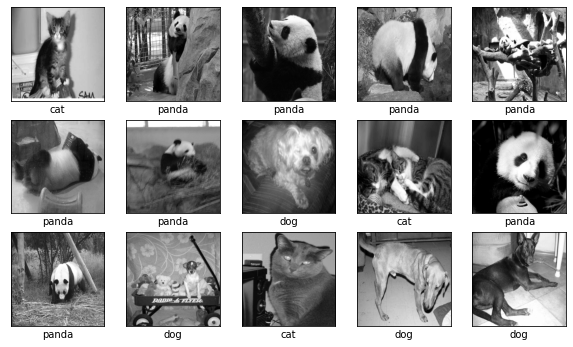

In [36]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_data[i][0],cmap=plt.cm.gray)
    plt.xlabel(CATEGORIES[train_data[i][1]])
plt.show()

In [37]:
train_data[0][0]

array([[248, 194, 114, ..., 164, 172, 178],
       [248, 194, 114, ..., 164, 172, 178],
       [248, 194, 114, ..., 163, 171, 177],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

## Test_data

In [70]:
test_data=[]

try:
    test_img_array=cv2.imread('C:/Users/kakon/Documents/Computer vision/animal_dataset/test/cat.jpg',cv2.IMREAD_GRAYSCALE) # numpy array
    test_img_resized=cv2.resize(test_img_array,(IMG_SIZE,IMG_SIZE))
    test_data.append([test_img_resized,0]) 
except Exception as e:
    pass
test_data[0][0]

array([[149, 168, 163, ..., 141, 139, 118],
       [142, 161, 164, ..., 126, 117,  90],
       [127, 137, 140, ..., 116, 102,  74],
       ...,
       [ 39,  39,  39, ...,  37,  26,  12],
       [ 33,  34,  35, ...,   8,  28,  42],
       [ 29,  32,  33, ...,  52,  49,  53]], dtype=uint8)

In [71]:
try:
    test_img_array=cv2.imread('C:/Users/kakon/Documents/Computer vision/animal_dataset/test/dog.jpg',cv2.IMREAD_GRAYSCALE) # numpy array
    test_img_resized=cv2.resize(test_img_array,(IMG_SIZE,IMG_SIZE))
    test_data.append([test_img_resized,1]) 
except Exception as e:
    pass


In [72]:
try:
    test_img_array=cv2.imread('C:/Users/kakon/Documents/Computer vision/animal_dataset/test/panda.jpg',cv2.IMREAD_GRAYSCALE) # numpy array
    test_img_resized=cv2.resize(test_img_array,(IMG_SIZE,IMG_SIZE))
    test_data.append([test_img_resized,2]) 
except Exception as e:
    pass

In [58]:
for i in range(3):
    print(test_data[i][0])

[[149 168 163 ... 141 139 118]
 [142 161 164 ... 126 117  90]
 [127 137 140 ... 116 102  74]
 ...
 [ 39  39  39 ...  37  26  12]
 [ 33  34  35 ...   8  28  42]
 [ 29  32  33 ...  52  49  53]]
[[150 150 150 ... 144 143 143]
 [150 150 150 ... 144 143 143]
 [150 150 150 ... 144 143 143]
 ...
 [186 187 188 ... 190 190 190]
 [187 187 188 ... 188 189 189]
 [188 188 189 ... 186 188 188]]
[[ 3  3  2 ...  0  0  2]
 [ 3  4  5 ...  0  1  2]
 [60 60 58 ... 36 43 47]
 ...
 [ 2  2  2 ...  0  1  1]
 [ 2  2  1 ...  0  1  1]
 [ 0  0  0 ...  0  0  0]]


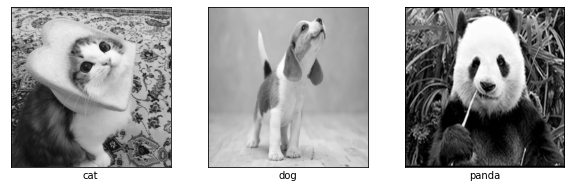

In [74]:
plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i][0],cmap=plt.cm.gray)
    plt.xlabel(CATEGORIES[test_data[i][1]])
plt.show()

## KNN - Prediction with L1 Distance ( Manhanttan)

In [115]:
def l1_distance(test,k):    
    x=[]

    for i in range(0,3000):
        x.append(np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten()))))

    for j in (np.argsort(x)[:k]):
        for i in tqdm(range(0,3000)):
            if np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten())))==x[j]:
                print(CATEGORIES[train_data[i][1]])
                break

## KNN-Prediction with L2 Distance(Euclidian)

In [111]:
def l2_distance(test,k): 
    x=[]
    
    for i in range(0,3000):
        
        x.append(math.sqrt(np.sum(pow(np.subtract(train_data[i][0].flatten(),test.flatten()),2))))

    for j in (np.argsort(x)[:k]):

        for i in tqdm(range(0,3000)):
            if math.sqrt(np.sum(pow(np.subtract(train_data[i][0].flatten(),test.flatten()),2)))==x[j]:
                print(CATEGORIES[train_data[i][1]])
                break

### L1 Distance Prediction

In [117]:
l1_distance(test_data[0][0],1)  # K =1

 12%|████████▉                                                                     | 346/3000 [00:00<00:02, 892.84it/s]

cat


In [118]:
l1_distance(test_data[1][0],5)  # K =5

  3%|██▌                                                                            | 95/3000 [00:00<00:03, 943.13it/s]

cat


  3%|██▏                                                                            | 82/3000 [00:00<00:03, 814.06it/s]

dog


  3%|██▌                                                                            | 96/3000 [00:00<00:03, 953.05it/s]

dog


  3%|██▎                                                                            | 87/3000 [00:00<00:03, 863.72it/s]

cat


 29%|██████████████████████▉                                                       | 883/3000 [00:01<00:02, 828.56it/s]

cat


In [120]:
l1_distance(test_data[2][0],1)  # K =1

  1%|▊                                                                              | 33/3000 [00:00<00:04, 661.35it/s]

dog


### L2 Distance Prediction

In [122]:
l2_distance(test_data[0][0],1)  # K =1

 62%|███████████████████████████████████████████████▉                             | 1866/3000 [00:02<00:01, 726.61it/s]

cat


In [126]:
l2_distance(test_data[1][0],5)  # K =5

  0%|                                                                                         | 0/3000 [00:00<?, ?it/s]

cat
cat
cat


  6%|████▊                                                                         | 183/3000 [00:00<00:03, 910.34it/s]

cat


 55%|██████████████████████████████████████████▎                                  | 1649/3000 [00:01<00:01, 916.13it/s]

cat


In [127]:
l2_distance(test_data[2][0],1)  # K =1

 27%|████████████████████▊                                                         | 799/3000 [00:00<00:02, 829.89it/s]

panda
